Station popularity (using trip count)

In [23]:
import pandas as pd

# Load your trip data with community information
file_path = 'complete_data_with_communities.csv'  # Update this path if needed
df = pd.read_csv(file_path)

# Calculate the number of trips where each station was the starting point
start_counts = df['Start station'].value_counts().reset_index()
start_counts.columns = ['Station', 'Start Count']

# Count the number of trips where each station was the ending point
end_counts = df['End station'].value_counts().reset_index()
end_counts.columns = ['Station', 'End Count']

# Merge the counts into a single DataFrame
station_trip_counts = pd.merge(start_counts, end_counts, on='Station', how='outer')

# Fill any NaN values with 0 (in case a station only appears as either start or end point)
station_trip_counts = station_trip_counts.fillna(0)

# Calculate the total trips involving each station
station_trip_counts['Total Trips'] = station_trip_counts['Start Count'] + station_trip_counts['End Count']

# Calculate the Start/End ratio
station_trip_counts['Start/End'] = station_trip_counts['Start Count'] / station_trip_counts['End Count']

# Merge community information back into the trip counts dataset
# Use the 'Start station' and 'Community_start' columns for the merge
station_communities = df[['Start station', 'Community_start']].drop_duplicates().rename(
    columns={'Start station': 'Station', 'Community_start': 'Community'})

# Merge with the trip counts
station_trip_counts = pd.merge(station_trip_counts, station_communities, on='Station', how='left')

# Display the merged dataset
print(station_trip_counts)

# Optionally, save the result to a CSV file
station_trip_counts.to_csv('station_trip_counts_with_communities.csv', index=False)


                                        Station  Start Count  End Count  \
0                  Waterloo Station 3, Waterloo         4659       4998   
1                  Waterloo Station 1, Waterloo         2984       2918   
2                    Argyle Street, Kings Cross         2454       2427   
3                  Waterloo Station 2, Waterloo         2360       1040   
4             Wormwood Street, Liverpool Street         2290       2171   
..                                          ...          ...        ...   
365  Westminster Bridge Road, Elephant & Castle           99        103   
366                     Royal Avenue 1, Chelsea           96        109   
367             Upper Grosvenor Street, Mayfair           58         49   
368                   Colombo Street, Southwark           22         15   
369           Goswell Road (City Uni), Finsbury           14          5   

     Total Trips  Start/End  Community  
0           9657   0.932173          1  
1           5902 

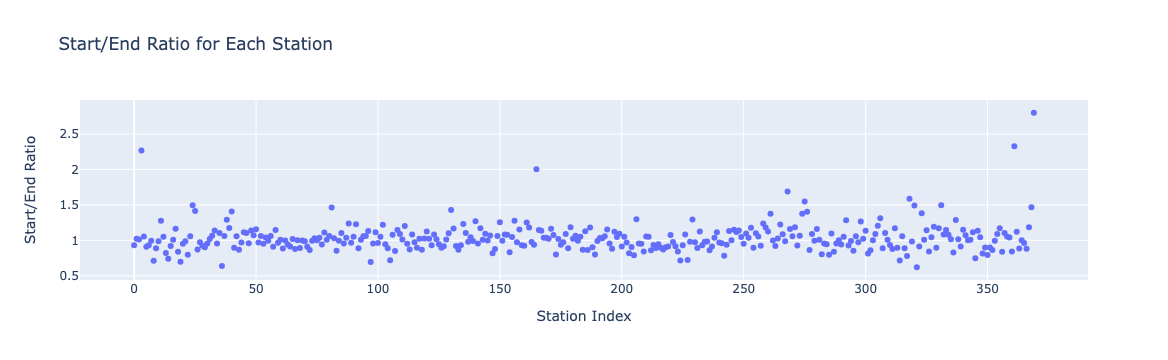

In [24]:
import pandas as pd
import plotly.express as px
file_path = 'station_trip_counts_with_communities.csv'
df = pd.read_csv(file_path)

# Assuming station_trip_counts is your DataFrame with the 'Start/End' column

# Create the interactive scatter plot
fig = px.scatter(
    station_trip_counts,
    x=range(len(station_trip_counts)),  # X-axis as the index of stations
    y='Start/End',                      # Y-axis as the Start/End ratio
    hover_name='Station',               # The station name will be shown on hover
    title='Start/End Ratio for Each Station',
    labels={'x': 'Station Index', 'Start/End': 'Start/End Ratio'},
    hover_data={'Start Count': True, 'End Count': True, 'Total Trips': True},  # More info on hover
)

# Show the plot
fig.show()

Looking at communities

In [27]:
import pandas as pd

file_path = 'station_trip_counts_with_communities.csv'
df = pd.read_csv(file_path)

# Group by the start community and sum the trip counts
community_trip_counts = station_trip_counts.groupby('Community').agg({
    'Start Count': 'sum',
    'End Count': 'sum',
    'Total Trips': 'sum'
}).reset_index()

# Calculate the Start/End ratio for each community
community_trip_counts['Start/End'] = community_trip_counts['Start Count'] / community_trip_counts['End Count']

# Sort by total trips or Start/End ratio for analysis
community_trip_counts_sorted = community_trip_counts.sort_values(by='Total Trips', ascending=False)

# Display the community-level data
print(community_trip_counts_sorted)


   Community  Start Count  End Count  Total Trips  Start/End
1          1        65483      64135       129618   1.021018
0          0        61279      59554       120833   1.028965
2          2        51615      53526       105141   0.964298
3          3        33200      34362        67562   0.966184


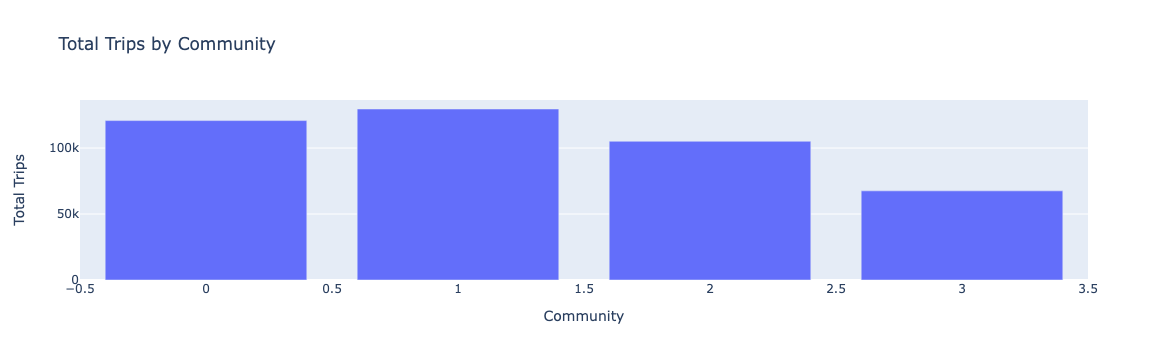

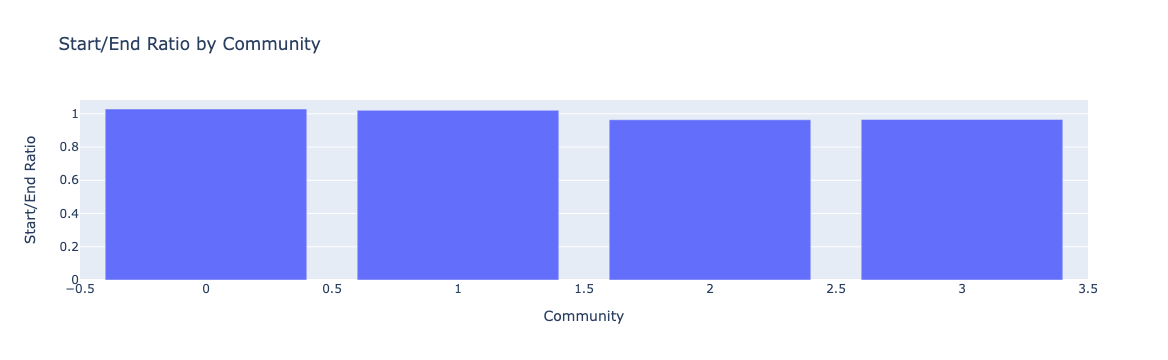

In [33]:
import plotly.express as px
import pandas as pd

file_path = 'station_trip_counts_with_communities.csv'
df = pd.read_csv(file_path)
# Create a bar plot for total trips by community
fig = px.bar(
    community_trip_counts_sorted,
    x='Community', 
    y='Total Trips',
    title='Total Trips by Community',
    labels={'Community': 'Community', 'Total Trips': 'Total Trips'},
    hover_data={'Start Count': True, 'End Count': True, 'Start/End': True}
)
fig.show()

# Create a bar plot for Start/End ratio by community
fig = px.bar(
    community_trip_counts_sorted,
    x='Community',
    y='Start/End',
    title='Start/End Ratio by Community',
    labels={'Community': 'Community', 'Start/End': 'Start/End Ratio'},
    hover_data={'Start Count': True, 'End Count': True, 'Total Trips': True}
)
fig.show()


In [36]:
df = pd.read_csv('complete_data_with_communities.csv')

# Create a pivot table to see trips between communities
inter_community_trips = df.pivot_table(
    index='Community_start',
    columns='Community_end',
    values='Number',  # Or use any other metric, like Total Trips
    aggfunc='count',
    fill_value=0
)

print(inter_community_trips)


Community_end        0      1      2      3
Community_start                            
0                34559  11317   7050   8353
1                11539  36599  13284   4061
2                 6119  12367  27563   5566
3                 7337   3852   5629  16382


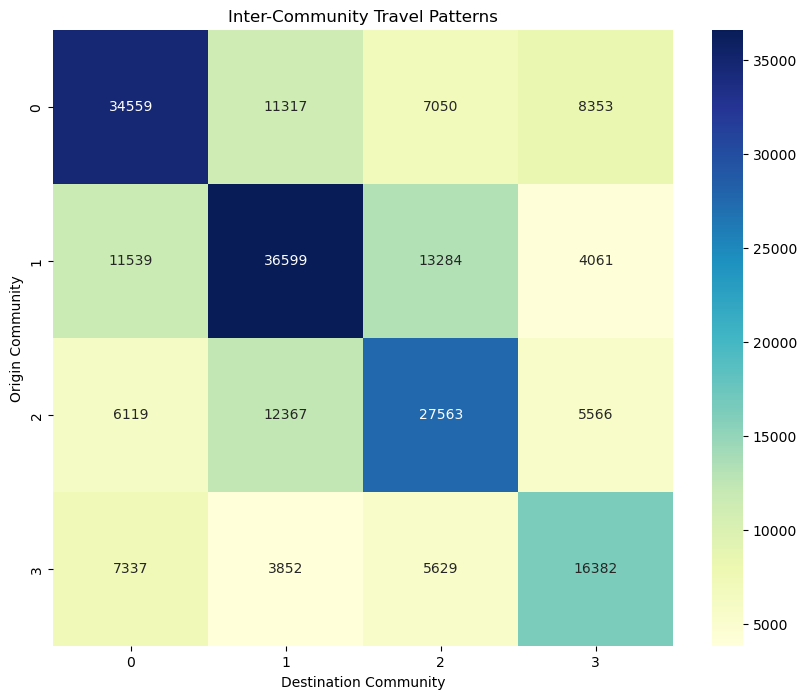

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap for the inter-community travel patterns
plt.figure(figsize=(10, 8))
sns.heatmap(inter_community_trips, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Inter-Community Travel Patterns')
plt.xlabel('Destination Community')
plt.ylabel('Origin Community')
plt.show()
